In [24]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from random import choice
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import add_dummy_feature

In [2]:
train_file = Path('../data/ItRain/train_parquet.csv')
test_file = Path('../data/ItRain/test_parquet.csv')

In [3]:
df_train = pd.read_parquet(train_file) 
df_test = pd.read_parquet(test_file)

In [4]:
y_vec = df_train.Expected
y_vec = np.array(y_vec)

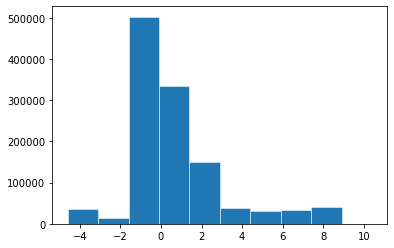

In [5]:
# plot:
fig, ax = plt.subplots()

ax.hist(np.log(y_vec), linewidth=0.5, edgecolor="white")

plt.show()

In [6]:
X = df_train.drop('Expected', axis=1)
y = df_train.Expected

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, shuffle=True)

In [8]:
columns = X_train.columns

In [9]:
# neste problema faremos um pipe seguido de um transformertarget usando log
pipe_X = Pipeline(
[
    ('prep_data', ColumnTransformer([
        ('num', Pipeline([
            ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
            ('std_num', StandardScaler())
        ]), columns),
    ])),
    ('model', GradientBoostingRegressor()),
    
])

In [10]:
pipe_X

Pipeline(steps=[('prep_data',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('std_num',
                                                                   StandardScaler())]),
                                                  Index(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th',
       'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object'))])),
                ('model', GradientBoostingRegressor())])

In [11]:
pipe_y = TransformedTargetRegressor(
    regressor=pipe_X,
    func=np.log, inverse_func=np.exp)

In [12]:
pipe_y

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('prep_data',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       Pipeline(steps=[('impute',
                                                                                                        SimpleImputer()),
                                                                                                       ('std_num',
                                                                                                        StandardScaler())]),
                                                                                       Index(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th',
       'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object'))])),
                                                     ('model',
                                                      GradientBoostingRegressor())]))

In [15]:
pipe_y.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('prep_data',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       Pipeline(steps=[('impute',
                                                                                                        SimpleImputer()),
                                                                                                       ('std_num',
                                                                                                        StandardScaler())]),
                                                                                       Index(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th',
       'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object'))])),
                                                     ('model',
                                                      GradientBoostingRegressor())]))

In [16]:
y_pred = pipe_y.predict(X_val)

In [17]:
y_pred

array([ 1.25964345,  1.21053593, 12.73632794, ...,  0.59254205,
        1.54344519, 17.77627929])

In [18]:
mean_absolute_error(y_val, y_pred)

131.54137462832404

### Faça a busca por hiperparametros , escolha o melhor

In [21]:
modelos = (
    Ridge(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    MLPRegressor((100,500,300,30,3,))
)

In [25]:
for model in modelos:
    pipe_X = Pipeline(
    [
        ('prep_data', ColumnTransformer([
            ('num', Pipeline([
                ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
                ('std_num', StandardScaler())
            ]), columns),
        ])),
        ('model', GradientBoostingRegressor()),

    ])
    
    pipe_y = TransformedTargetRegressor(
        regressor=pipe_X,
        func=np.log, inverse_func=np.exp)
    
    pipe_y.fit(X_train, y_train)
    y_pred = pipe_y.predict(X_val)
    scor = mean_squared_error(y_val, y_pred, squared=False)
    print(model)
    print(f"model: score: {scor}")

Ridge()
model: score: 620.2499509931723
GradientBoostingRegressor()
model: score: 620.2499509931723
RandomForestRegressor()
model: score: 620.2499509931723
DecisionTreeRegressor()
model: score: 620.2499509931723
SVR()
model: score: 620.2499509931723
MLPRegressor(hidden_layer_sizes=(100, 500, 300, 30, 3))
model: score: 620.2499509931723
